<a href="https://colab.research.google.com/github/nilu4u/IEEE_CIS_Fraud_Detection/blob/master/CIS_Fraud_Detection_Statistical_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IEEE-CIS Fraud Detection

Imagine standing at the check-out counter at the grocery store with a long line behind you and the cashier not-so-quietly announces that your card has been declined. In this moment, you probably aren’t thinking about the data science that determined your fate.

Embarrassed, and certain you have the funds to cover everything needed for an epic nacho party for 50 of your closest friends, you try your card again. Same result. As you step aside and allow the cashier to tend to the next customer, you receive a text message from your bank. “Press 1 if you really tried to spend $500 on cheddar cheese.”

While perhaps cumbersome (and often embarrassing) in the moment, this fraud prevention system is actually saving consumers millions of dollars per year. Researchers from the IEEE Computational Intelligence Society (IEEE-CIS) want to improve this figure, while also improving the customer experience. With higher accuracy fraud detection, you can get on with your chips without the hassle.

IEEE-CIS works across a variety of AI and machine learning areas, including deep neural networks, fuzzy systems, evolutionary computation, and swarm intelligence. Today they’re partnering with the world’s leading payment service company, Vesta Corporation, seeking the best solutions for fraud prevention industry, and now you are invited to join the challenge.

In this competition, you’ll benchmark machine learning models on a challenging large-scale dataset. The data comes from Vesta's real-world e-commerce transactions and contains a wide range of features from device type to product features. You also have the opportunity to create new features to improve your results.

If successful, you’ll improve the efficacy of fraudulent transaction alerts for millions of people around the world, helping hundreds of thousands of businesses reduce their fraud loss and increase their revenue. And of course, you will save party people just like you the hassle of false positives.

## Library and Dataset Import

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 200)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.float_format', lambda x: '%.4f' % x)
np.set_printoptions(threshold=np.inf) #to avoid truncation of numpy array
#to reset the printoptions, np.set_printoptions(threshold=1000) since 1000 is the default

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
train_transaction = pd.read_csv("/content/gdrive/MyDrive/DS_Datas/IEEE CIS Card Fraud detection/train_transaction.csv")

In [6]:
train_transaction.shape

(590540, 394)

In [7]:
#checking for missing values

missing_df = round(100*train_transaction.isnull().sum()/train_transaction.shape[0],2)
print(missing_df[missing_df>0].sort_values(ascending=False))

dist2   93.6300
D7      93.4100
D13     89.5100
D14     89.4700
D12     89.0400
          ...  
V119     0.0500
V120     0.0500
V121     0.0500
V122     0.0500
V136     0.0500
Length: 342, dtype: float64


In [8]:
#dropping columns which are more than 40% Null

drop_cols = pd.DataFrame(missing_df[missing_df>40]).index
data = train_transaction.drop(drop_cols, axis=1)

In [9]:
data.shape

(590540, 202)

## Statistical Analysis on a sample of Data

In [10]:
#taking a random sample of 10,000 which dosent contain any null values and doing analysis on sampled data 
sample_data = data.dropna().sample(10000)

In [11]:
sample_data.shape

(10000, 202)

In [12]:
sample_data.describe(include='all')

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D4,D10,D15,M6,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
count,10000.0000,10000.0000,10000.0000,10000.0000,10000,10000.0000,10000.0000,10000.0000,10000,10000.0000,10000,10000.0000,10000.0000,10000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000
unique,nan,nan,nan,nan,1,nan,nan,nan,3,nan,3,nan,nan,45,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
top,nan,nan,nan,nan,W,nan,nan,nan,visa,nan,deb

In [13]:
#droping transaction_id and transactiondt for analysis

sample_data.drop(['TransactionID', 'TransactionDT'], axis=1,inplace=True)

In [14]:
#dropping ProductCD from analysis as it contains only one value after dropping Null values
sample_data.drop(['ProductCD'], axis=1,inplace=True)

We need to devide the sample data into categorical and non categorical data. However there are data which is in boolean but the data type is in float. For analysis purpose converting them to boolean

In [15]:
for col in sample_data.columns:
  if sample_data[col].max()==1.0000 and sample_data[col].min()==0:
    sample_data[col] =  sample_data[col].astype('object')

In [16]:
columns =sample_data.columns
start = 0
sets = 10
while ((start+sets) < len(columns)):
  end = start+sets
  print(sample_data[columns[start:end]].info())
  start=end

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 414245 to 2947
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isFraud         10000 non-null  object 
 1   TransactionAmt  10000 non-null  float64
 2   card1           10000 non-null  int64  
 3   card2           10000 non-null  float64
 4   card3           10000 non-null  float64
 5   card4           10000 non-null  object 
 6   card5           10000 non-null  float64
 7   card6           10000 non-null  object 
 8   addr1           10000 non-null  float64
 9   addr2           10000 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 859.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 414245 to 2947
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   P_emaildomain  10000 non-null  object 
 1   C1             10000 non-nul

In [17]:
#separating all the categorical columns from numeric

cat_cols = sample_data.select_dtypes(exclude=[np.number]).columns
num_cols = sample_data.select_dtypes(include=[np.number]).columns

In [18]:
cat_cols

Index(['isFraud', 'card4', 'card6', 'P_emaildomain', 'M6', 'V33', 'V41', 'V51',
       'V73', 'V94', 'V107'],
      dtype='object')

In [19]:
len(num_cols)

188

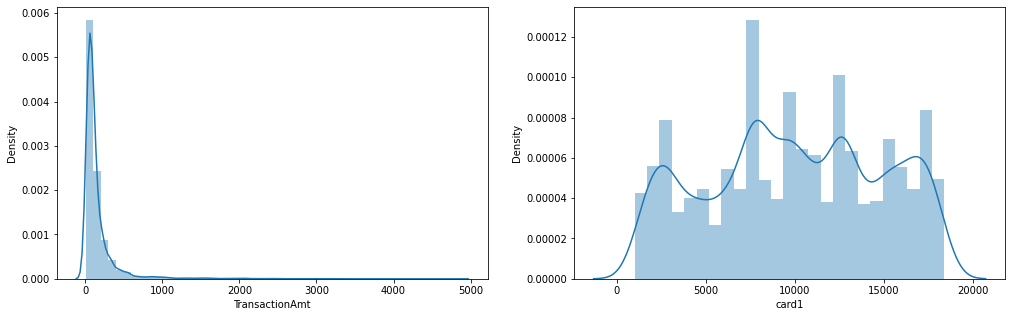

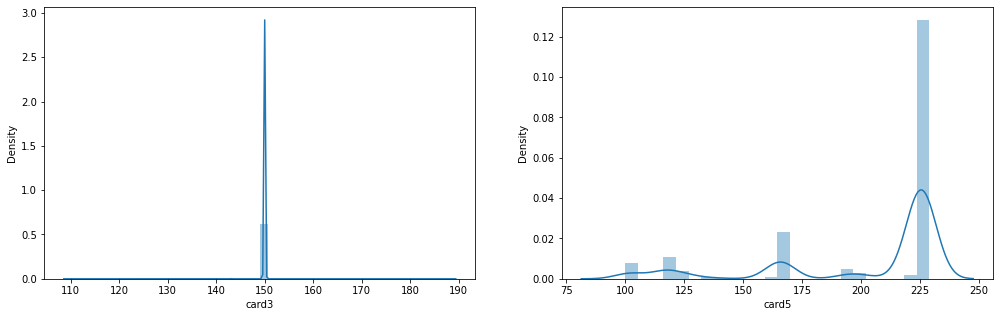

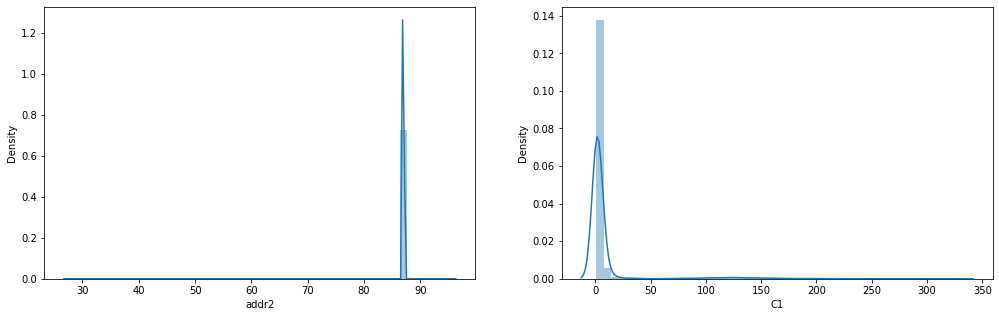

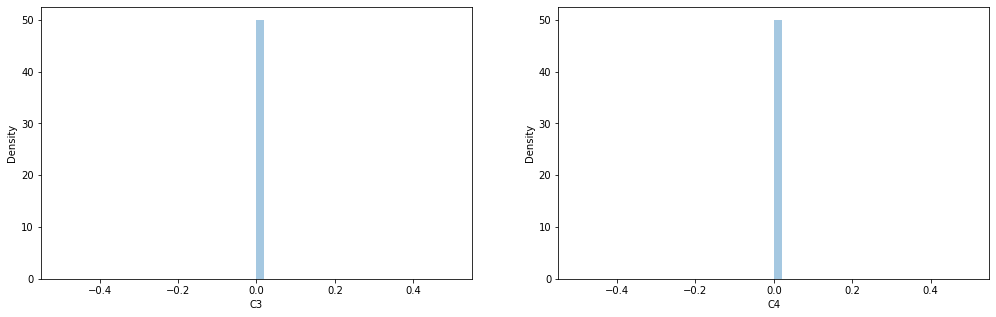

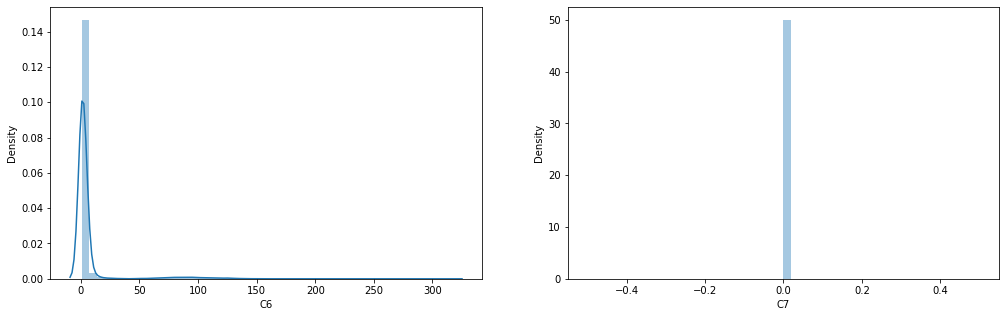

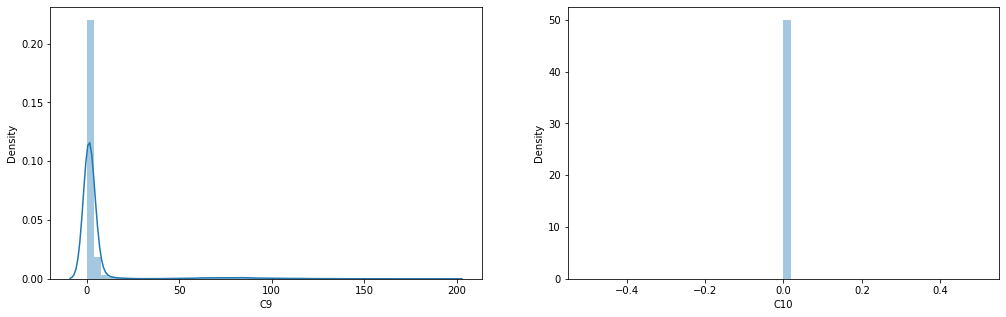

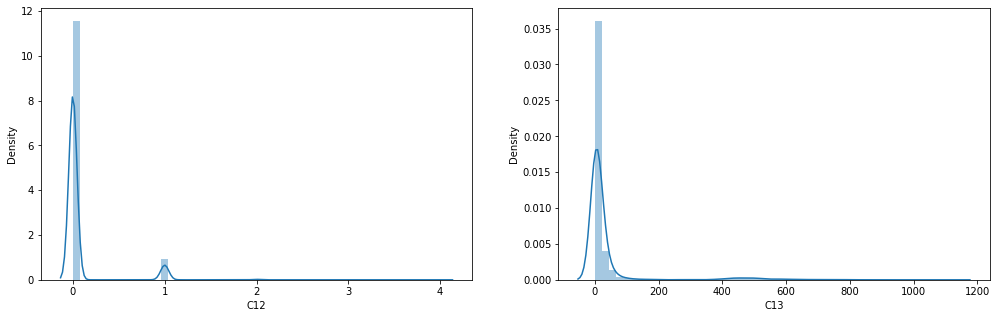

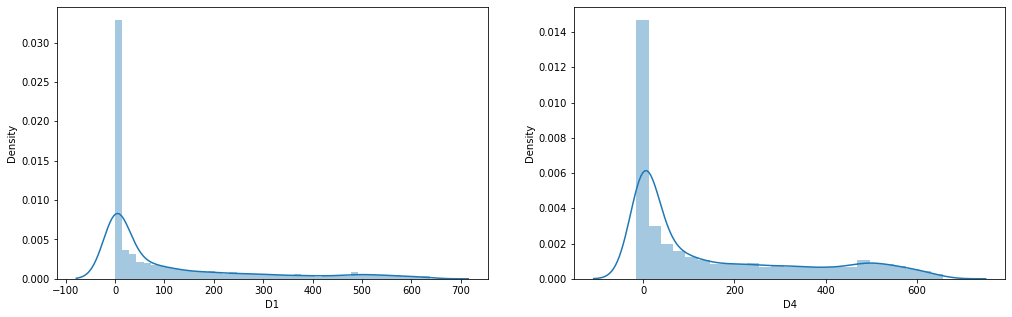

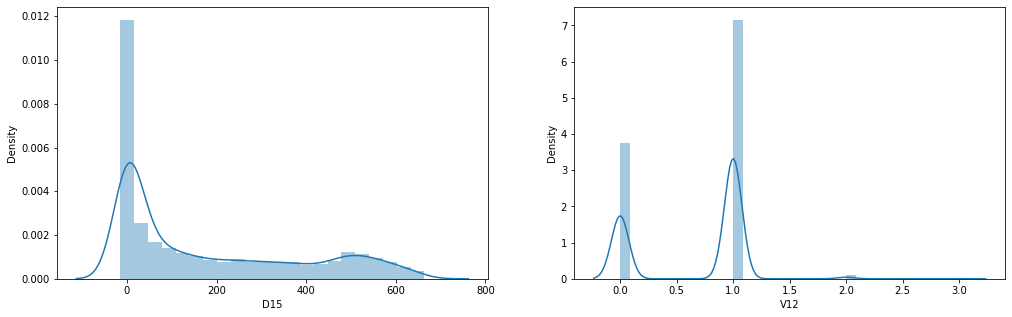

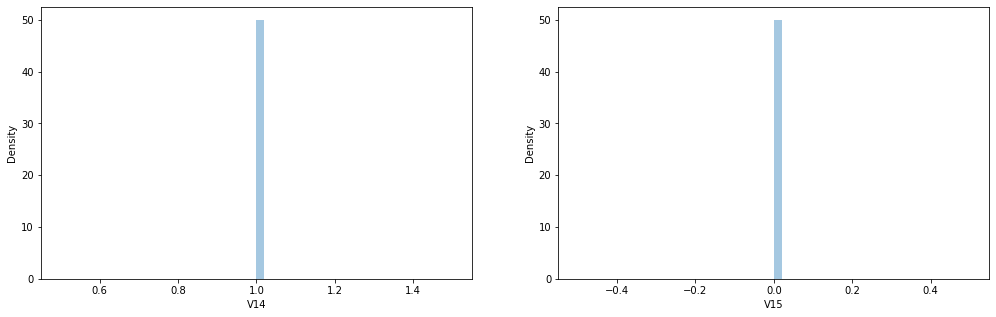

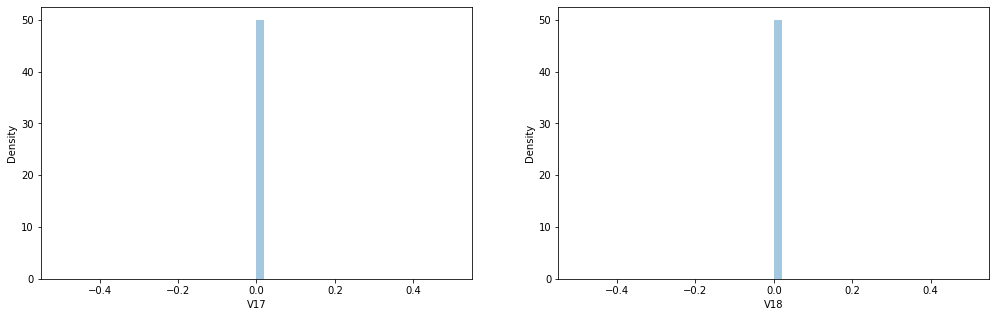

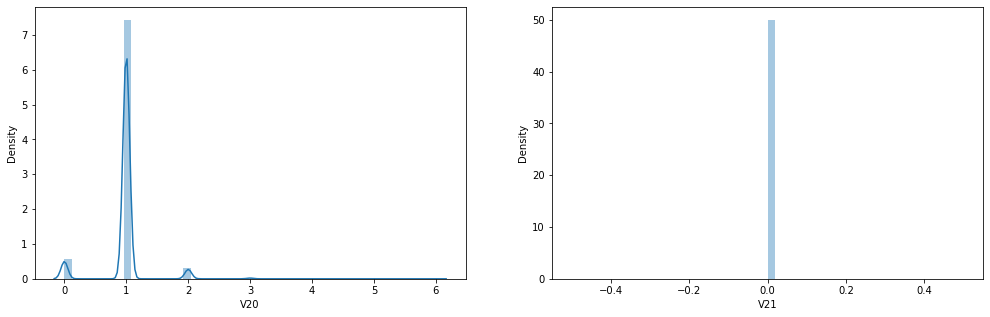

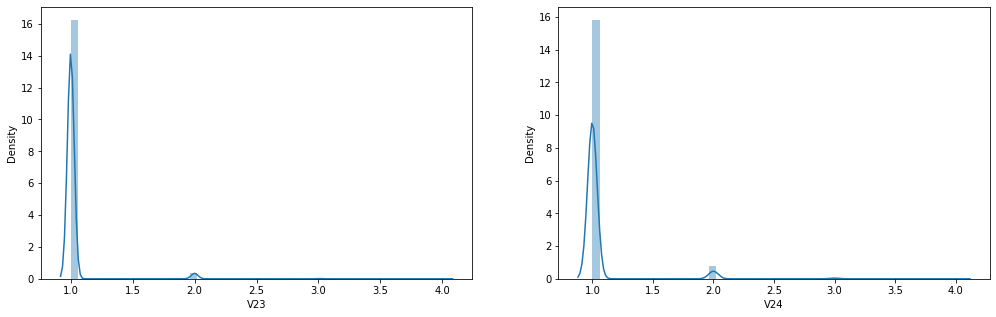

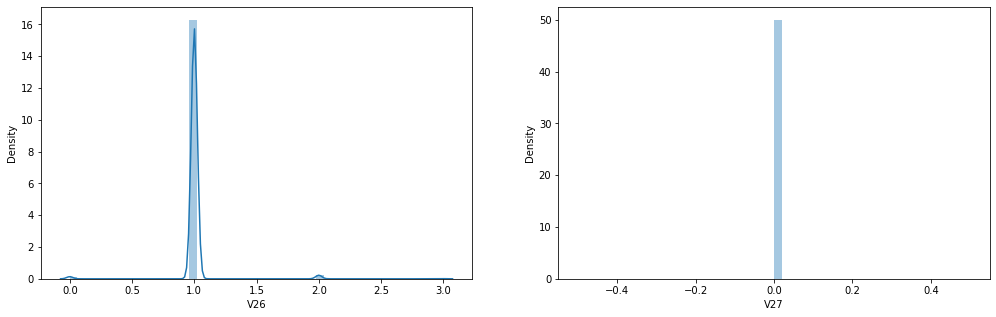

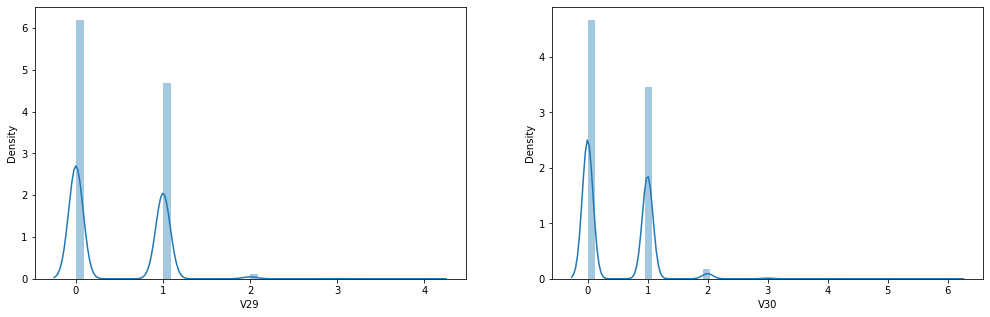

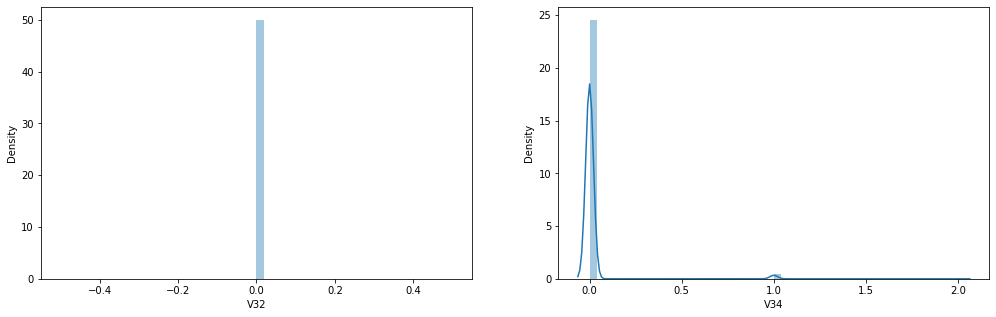

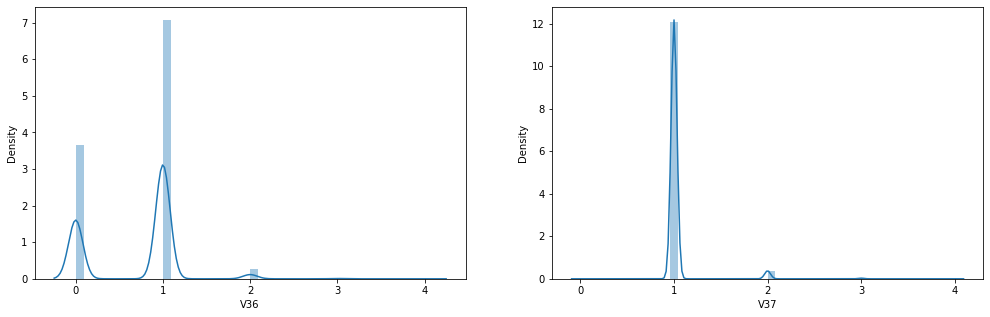

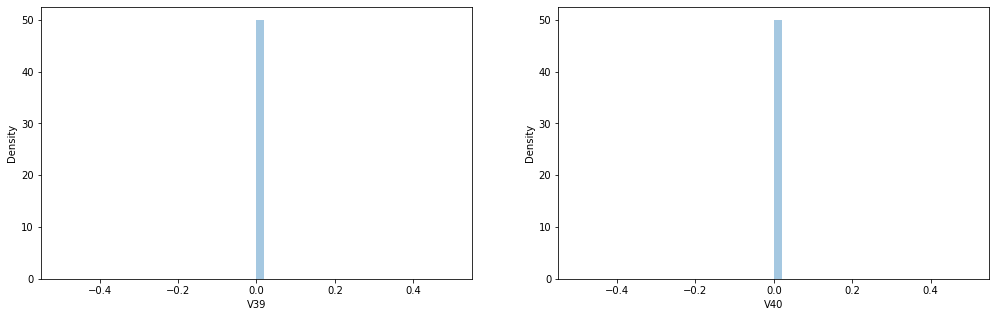

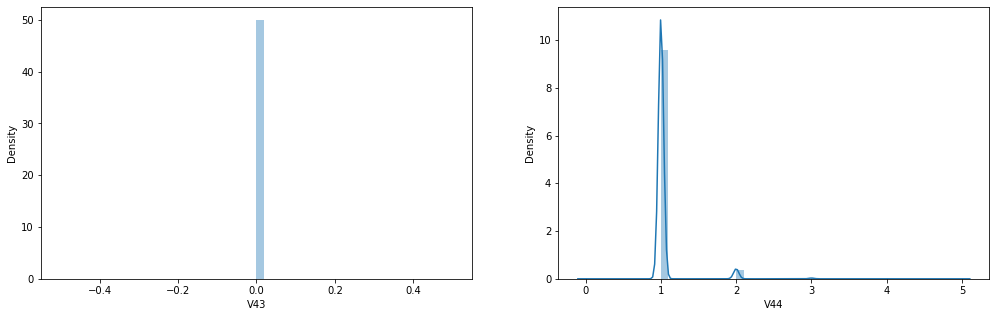

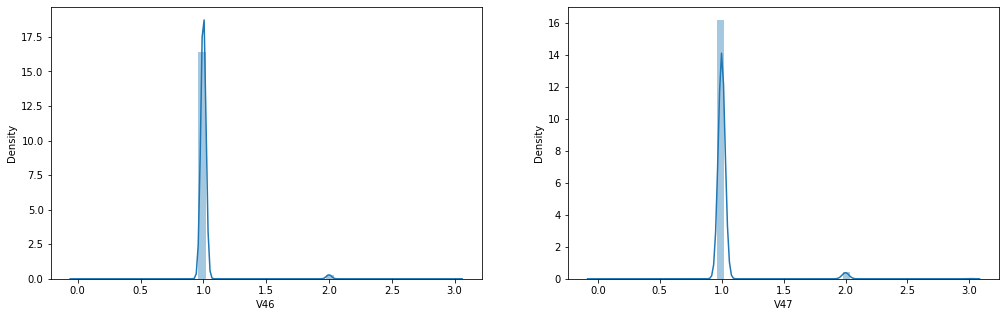

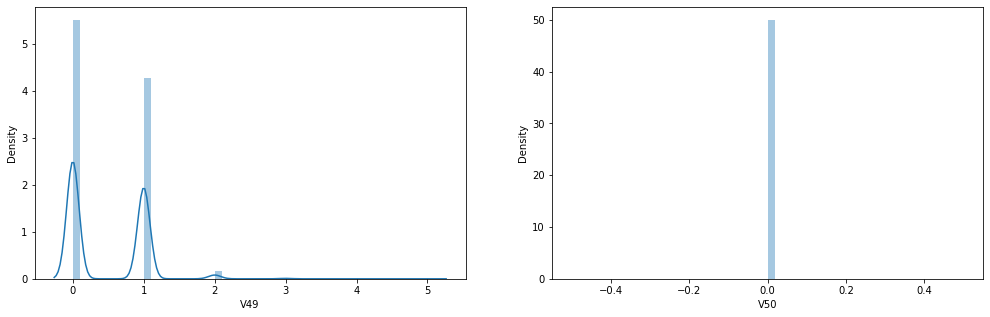

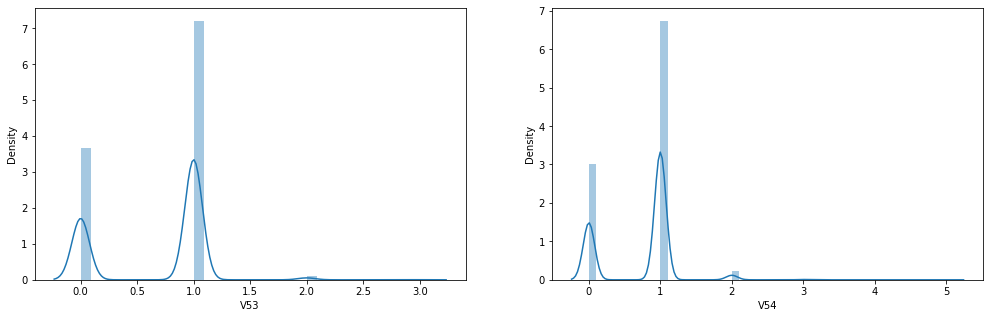

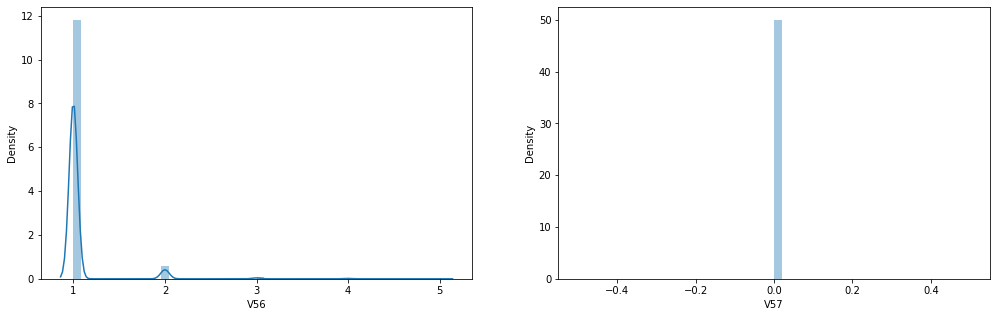

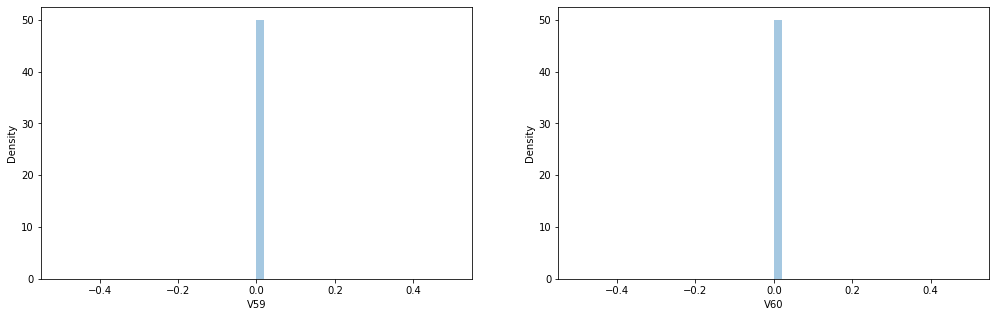

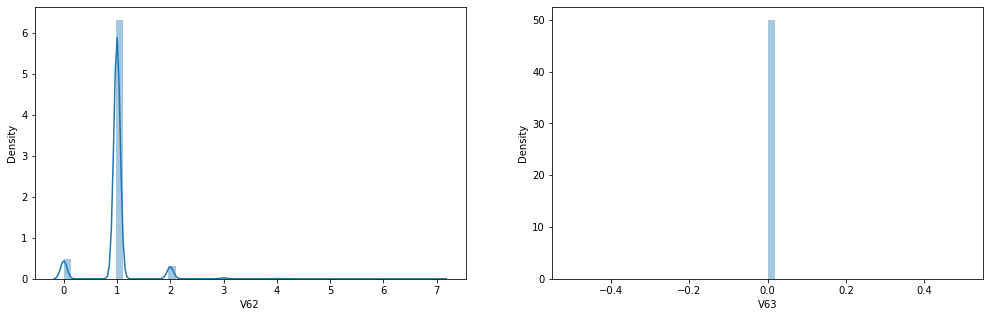

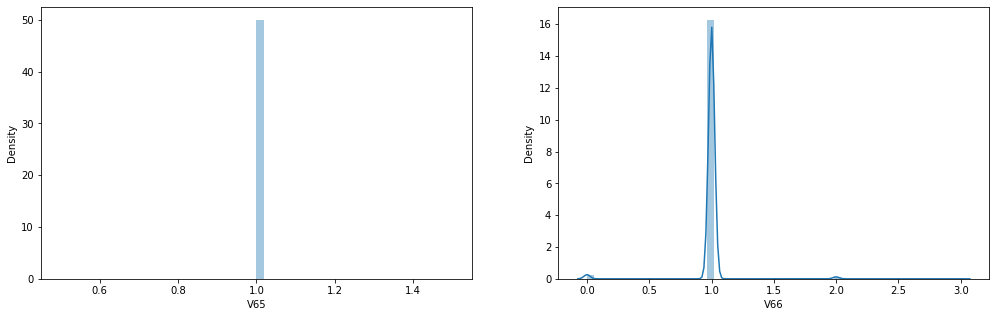

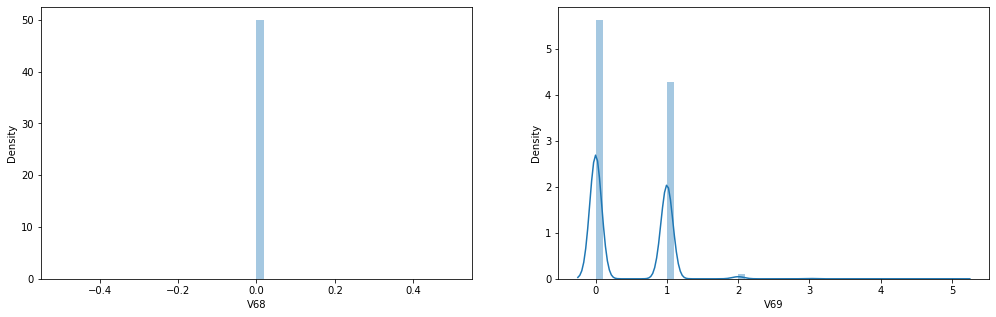

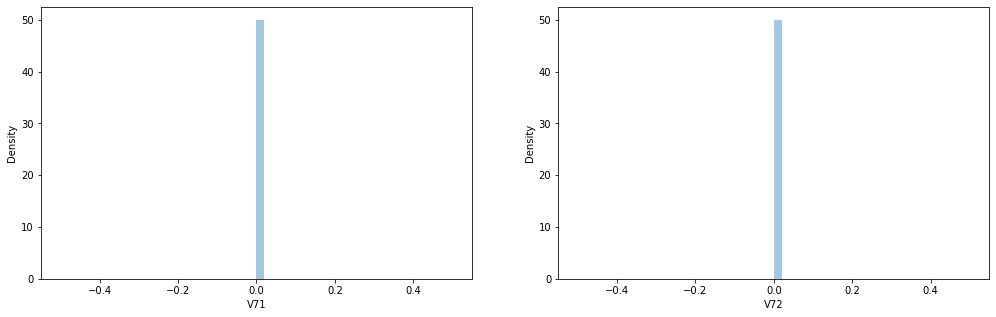

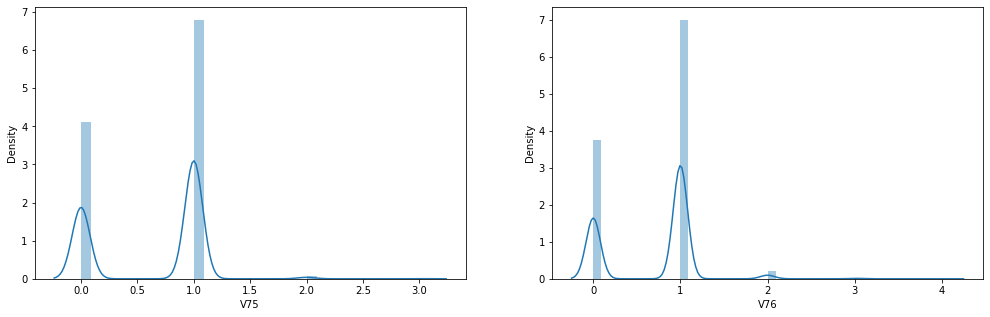

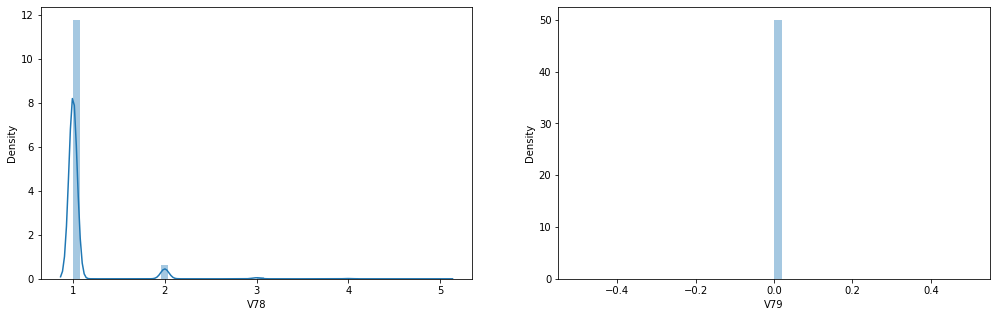

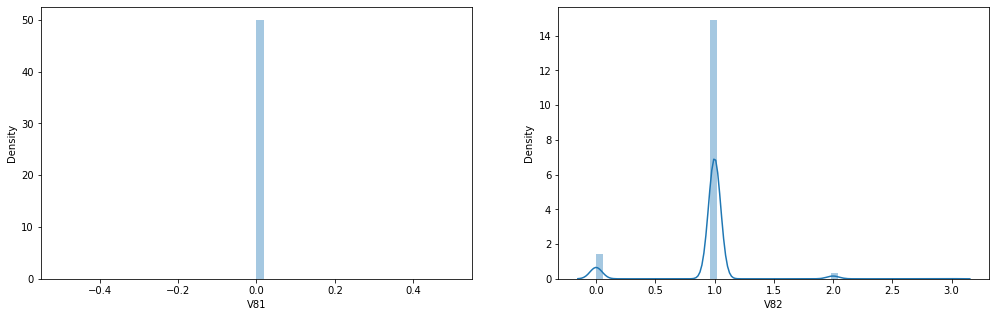

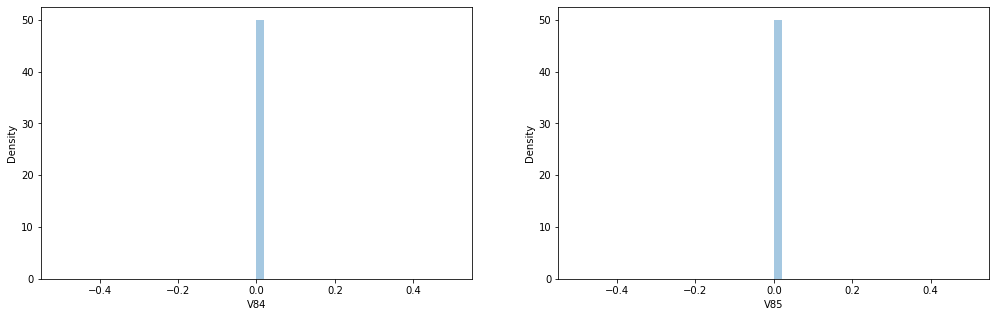

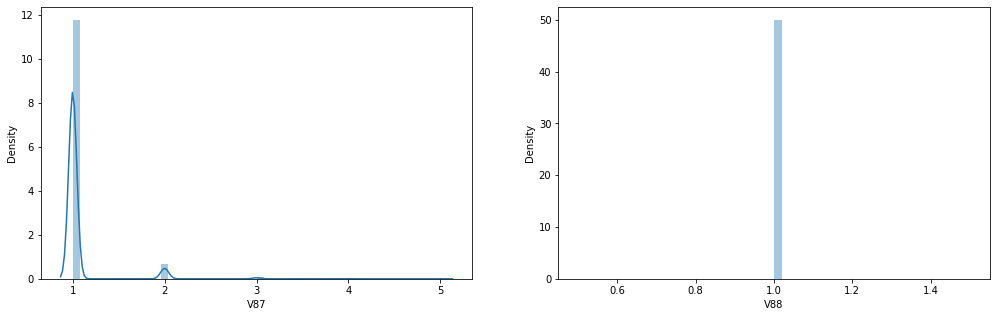

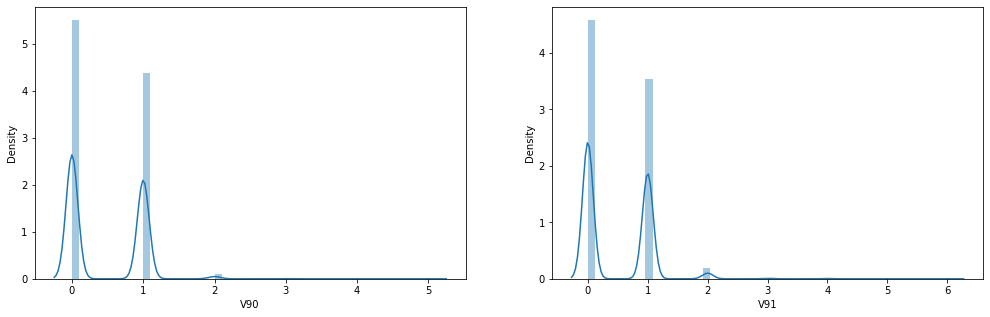

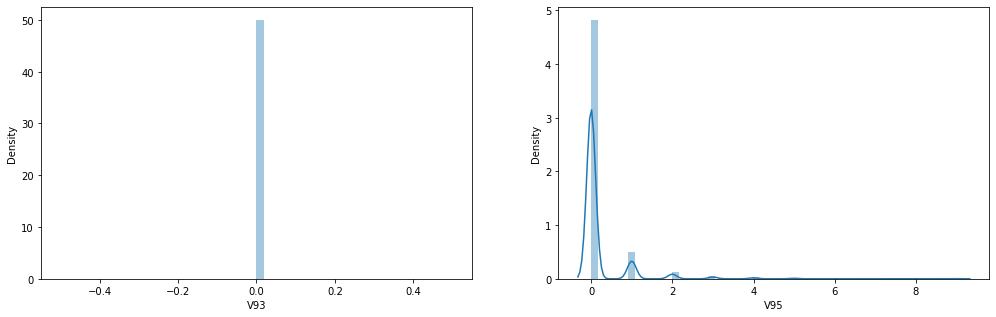

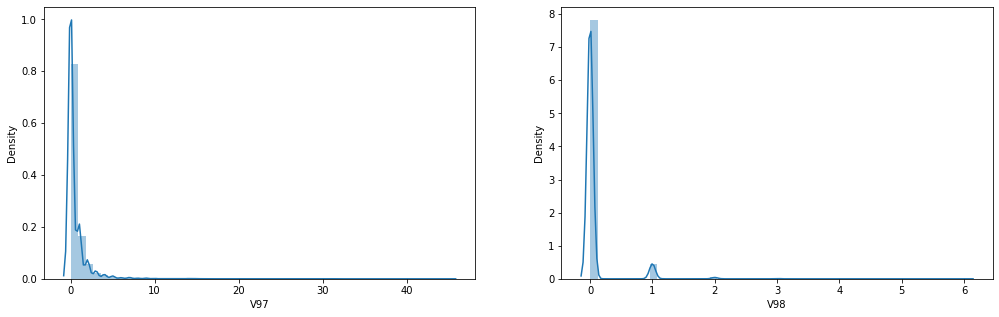

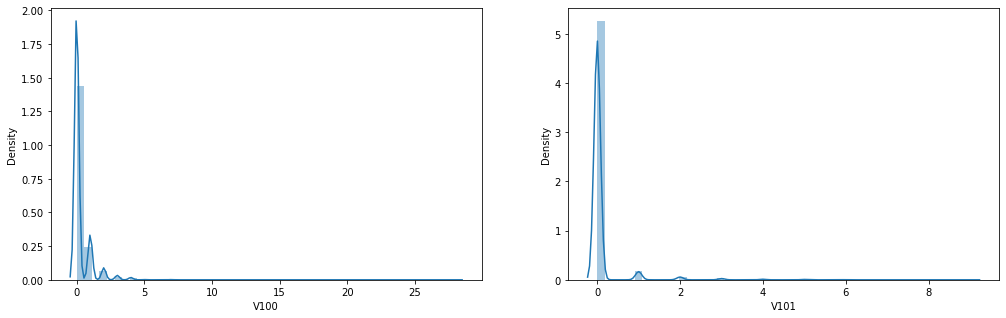

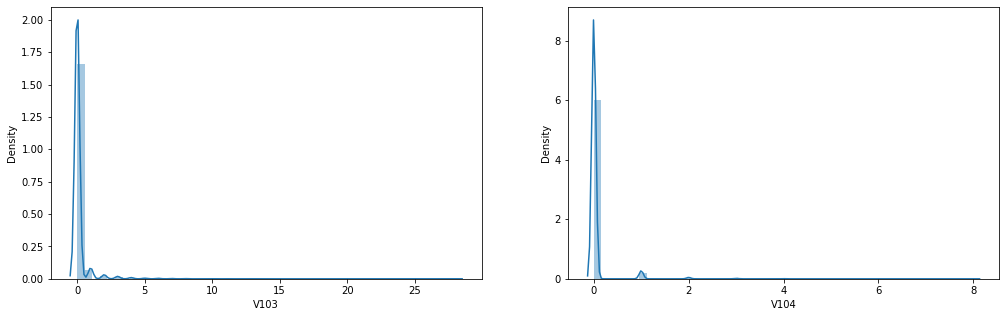

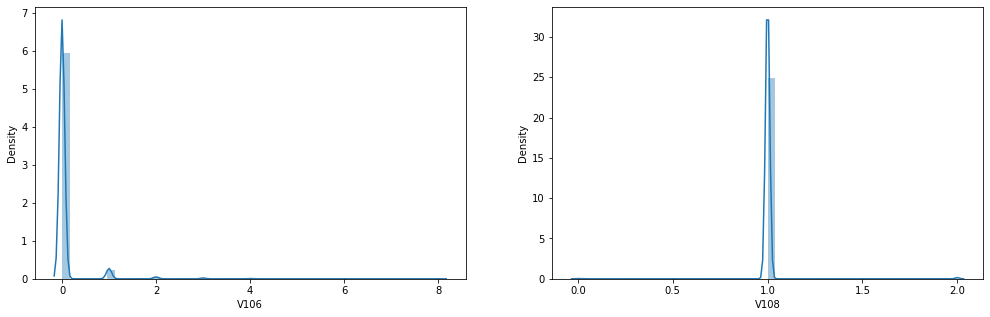

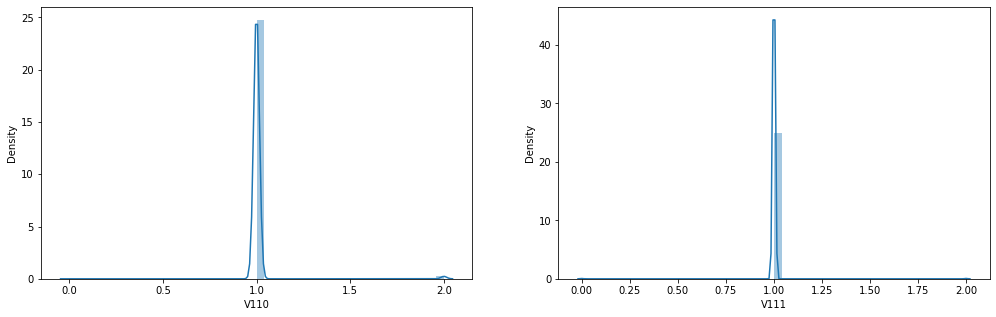

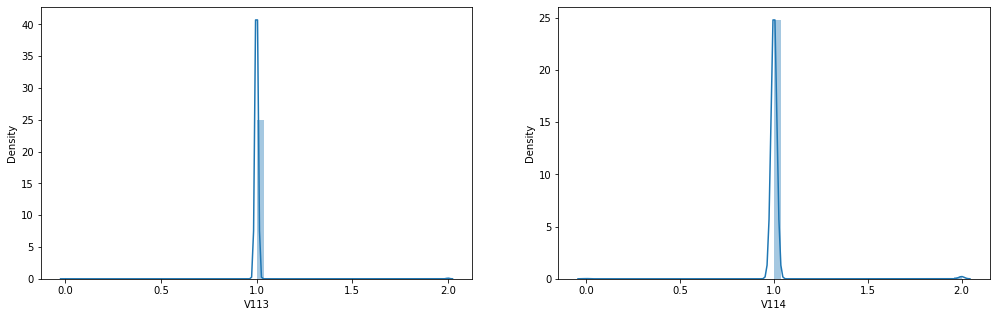

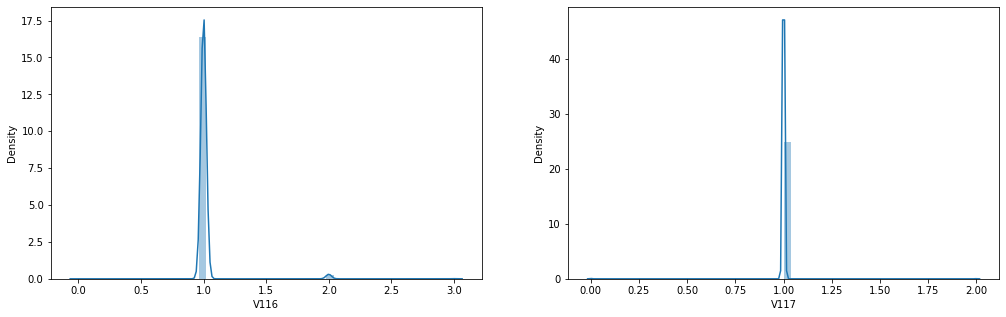

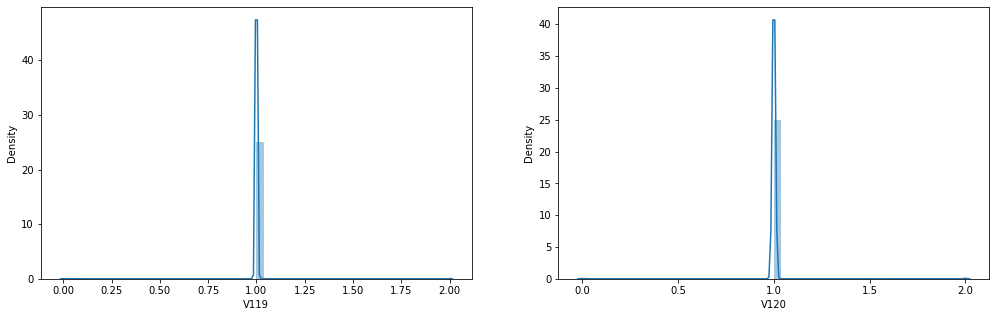

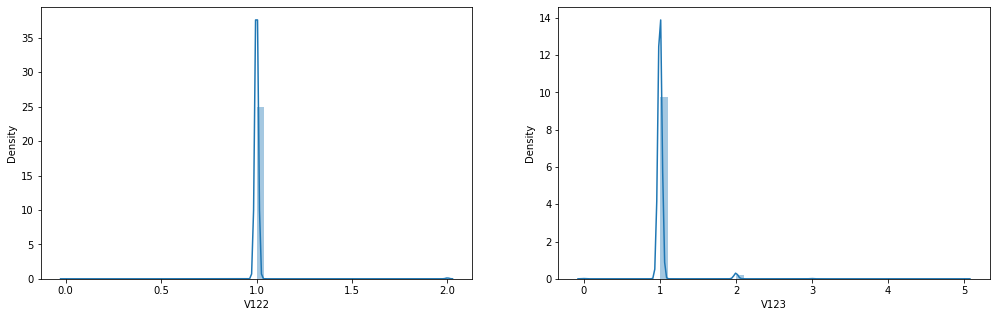

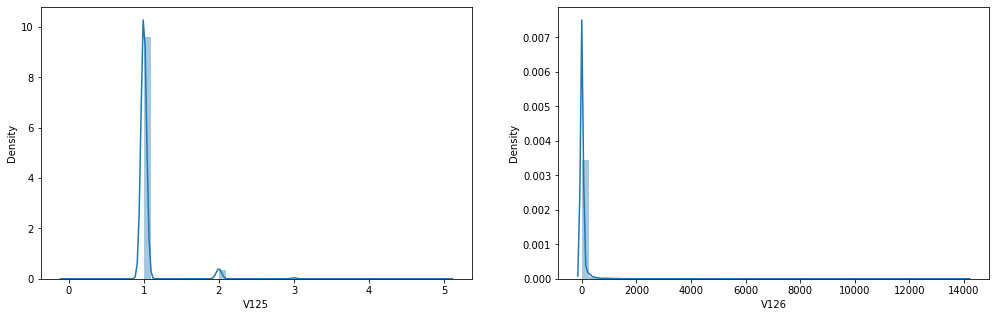

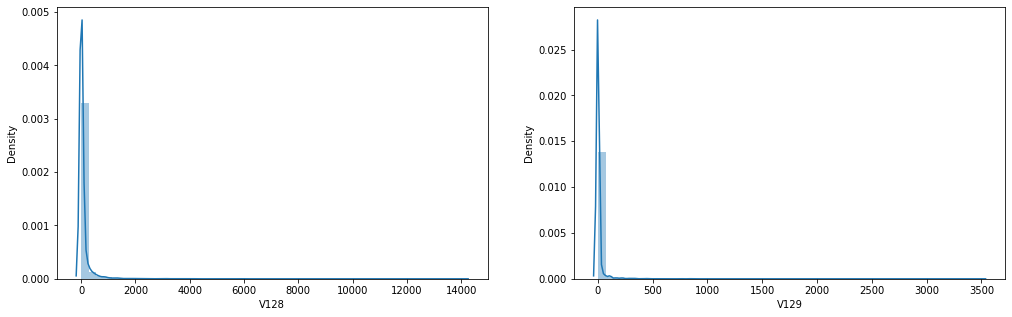

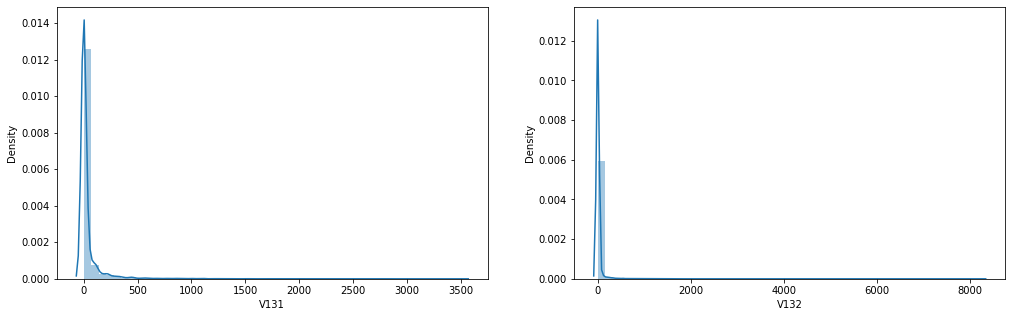

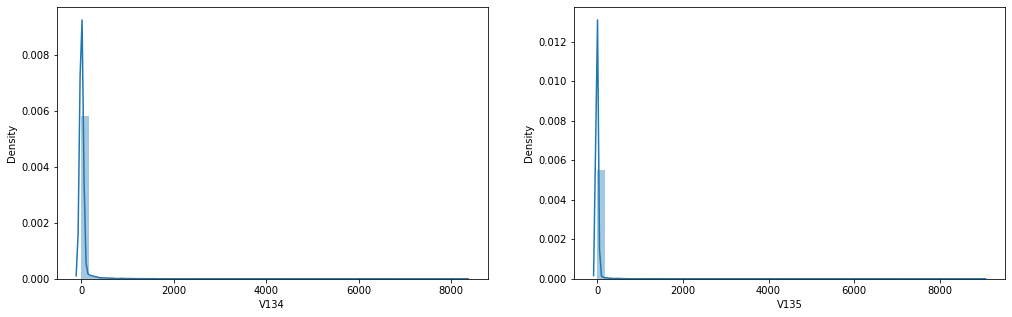

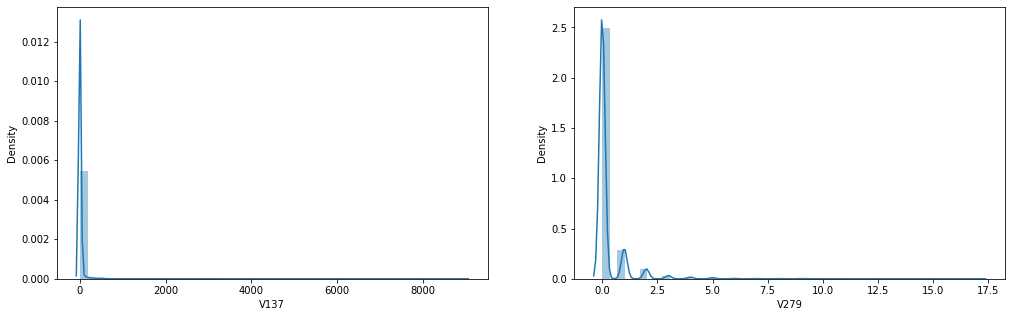

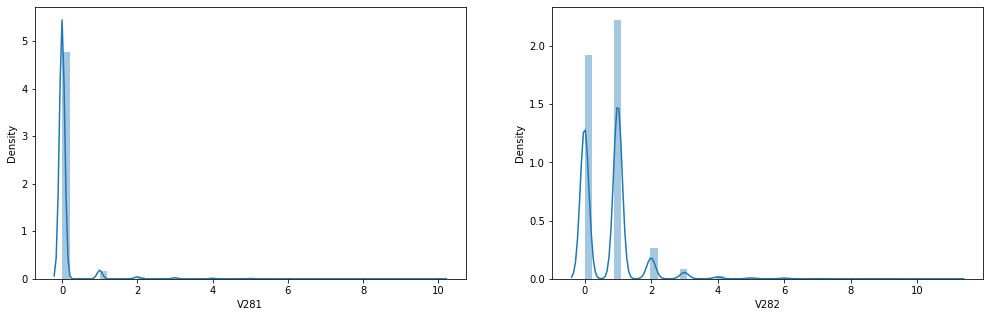

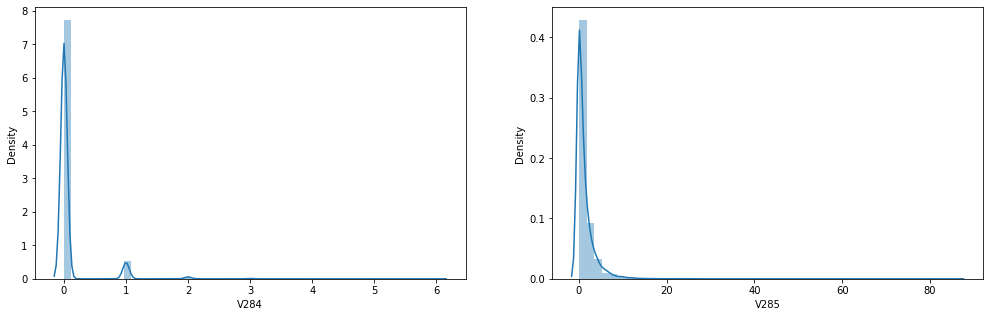

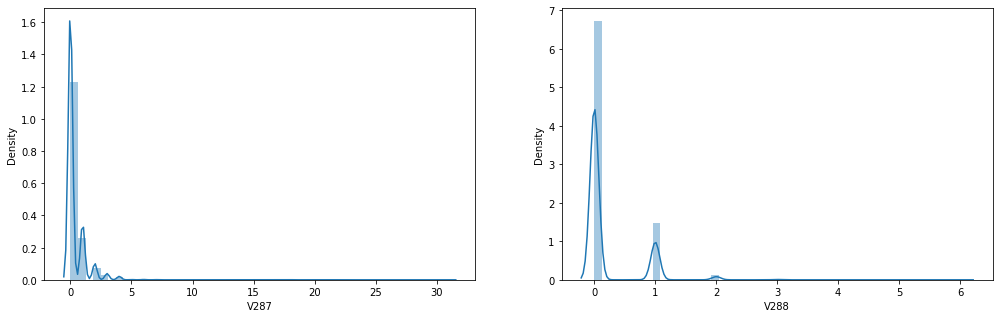

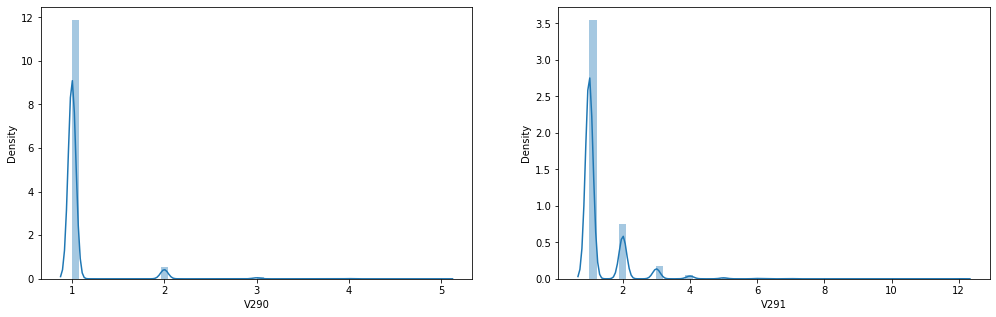

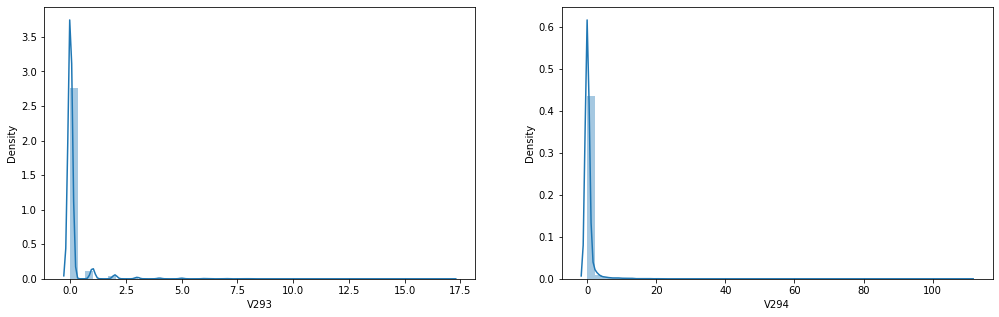

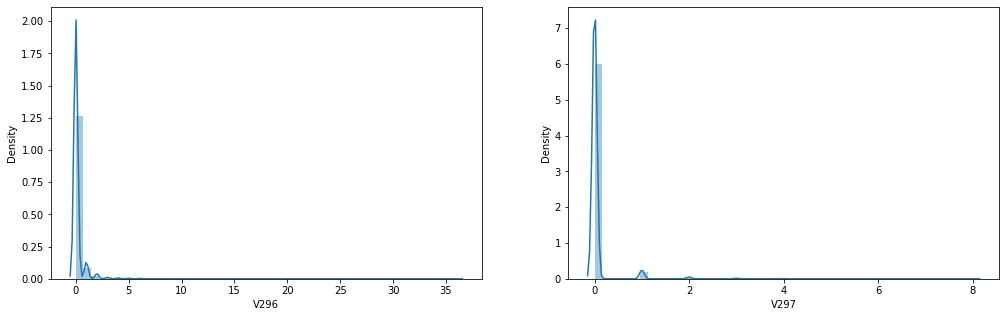

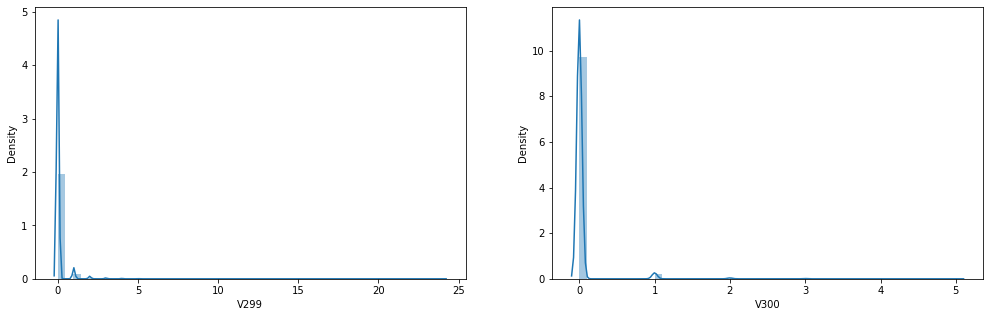

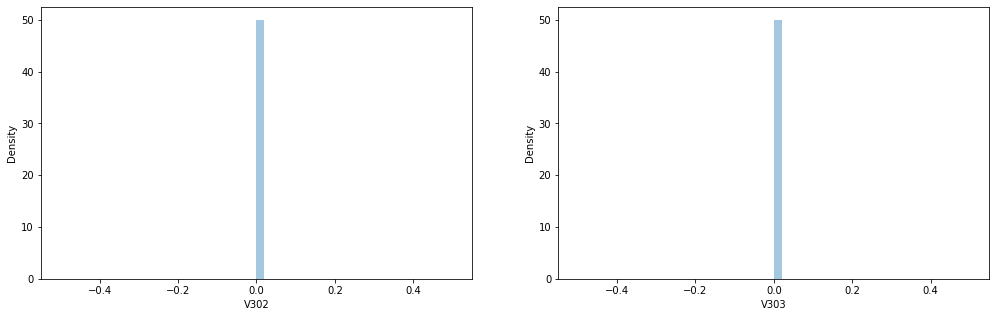

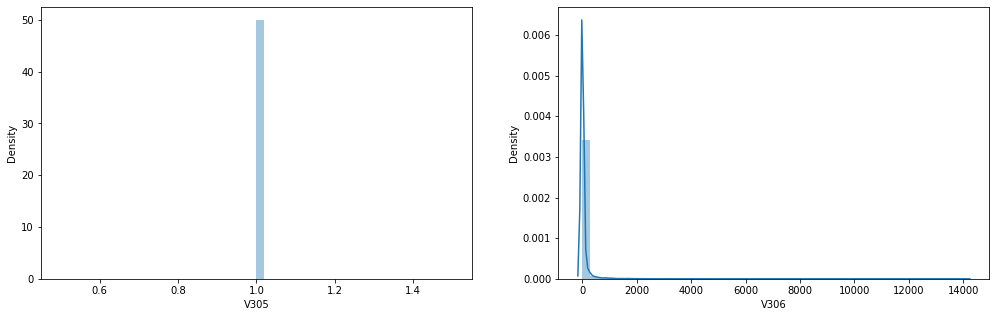

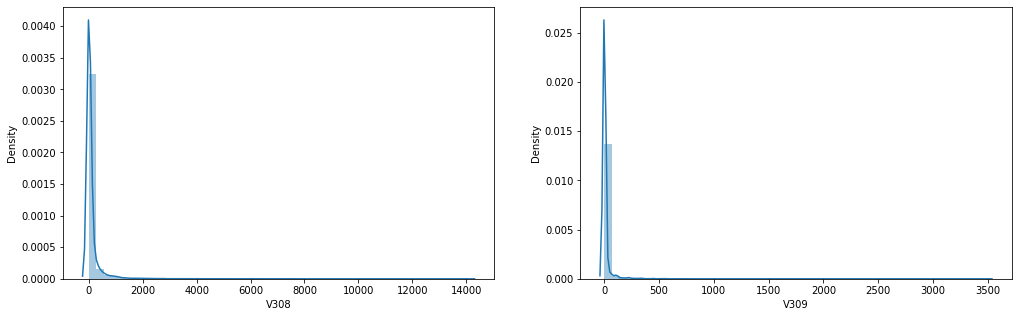

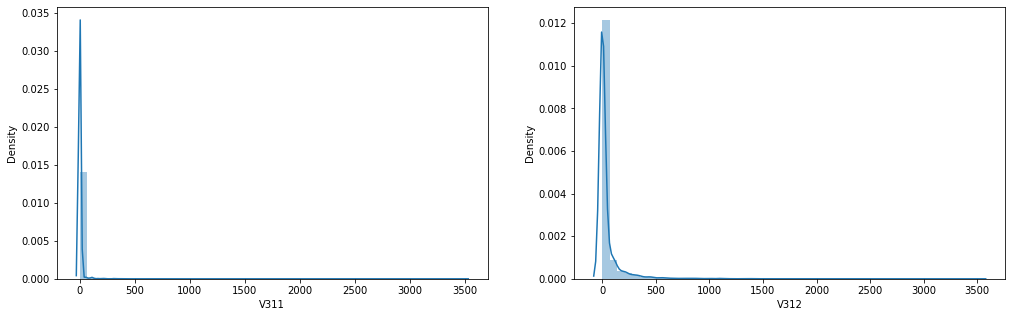

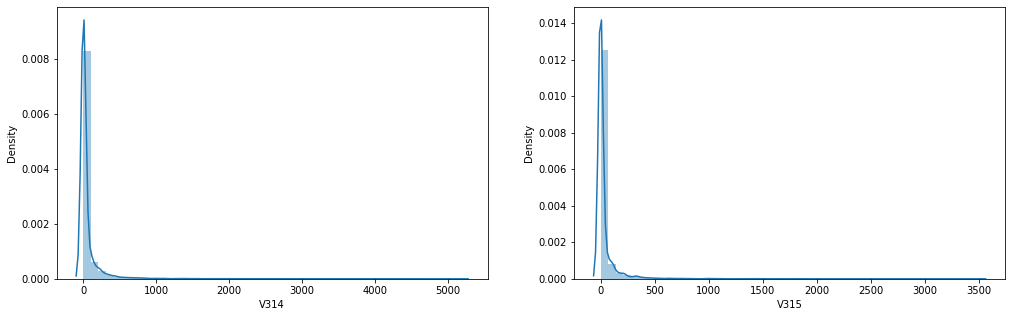

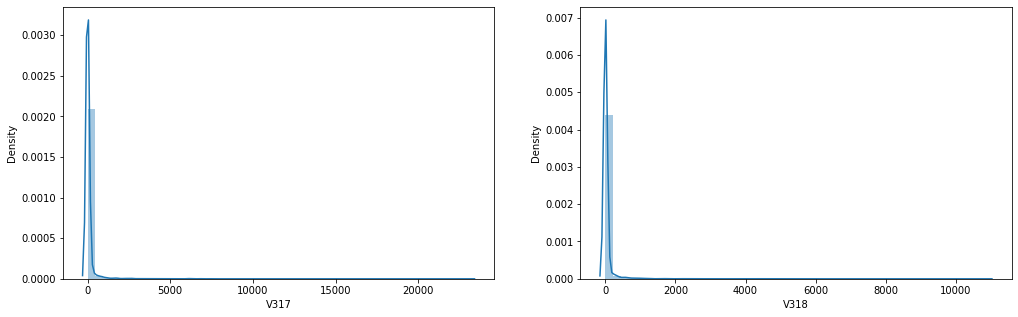

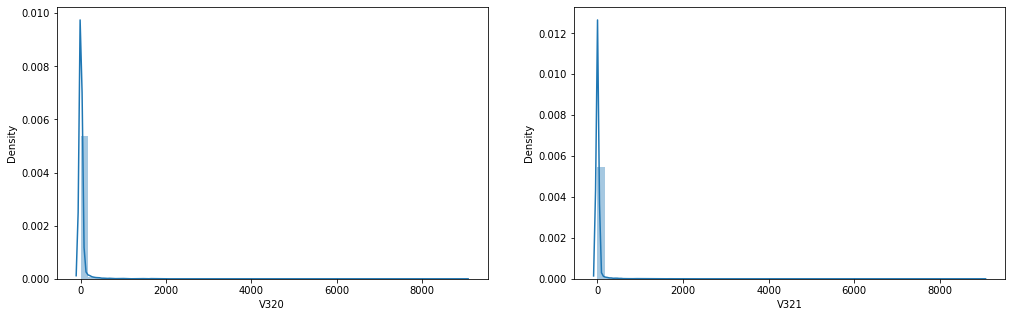

In [21]:
#checking for the skewness in numerical columns
for i in range(0,len(num_cols)-1,3):
  
  fig  = plt.figure(figsize=[17,5])

  ax1 = plt.subplot(1,2,1)
  sns.distplot(sample_data[num_cols[i]])


  ax2 = plt.subplot(1,2,2)
  sns.distplot(sample_data[num_cols[i+1]])

  #ax3 = plt.subplot(1,4,3)
  #sns.distplot(sample_data[num_cols[i+2]])

  #ax4 = plt.subplot(1,4,4)
  #sns.distplot(sample_data[num_cols[i+3]])

  plt.show()


Above graphs shows that most of the data is skewed

In [22]:
#using spearman correlation matrix to get high correlated columns
corr_cols = []
for i in range(len(num_cols)):
  for j in range(i+1, len(num_cols)):
    coeff = sample_data[[num_cols[i], num_cols[j]]].corr(method='spearman').iloc[0,1]
    if abs(coeff)>0.6:
      corr_cols.append(num_cols[j])

corr_cols = list(set(corr_cols))
np.array(corr_cols)

array(['V320', 'V308', 'V110', 'V103', 'V70', 'V287', 'V91', 'V293',
       'V105', 'V285', 'V137', 'V134', 'V120', 'V313', 'V289', 'V74',
       'V36', 'D4', 'V130', 'V56', 'V49', 'V129', 'V294', 'V45', 'V106',
       'V314', 'D10', 'V279', 'V317', 'V52', 'C13', 'V321', 'V97', 'V309',
       'V123', 'D15', 'V102', 'V295', 'V282', 'C14', 'V114', 'V132',
       'V62', 'V133', 'V83', 'V69', 'V54', 'V26', 'V318', 'V48', 'V122',
       'V119', 'V280', 'V124', 'V90', 'V297', 'V29', 'V99', 'V38', 'V131',
       'V306', 'C9', 'V87', 'V116', 'V307', 'V298', 'V86', 'D1', 'V127',
       'C2', 'V128', 'V76', 'V319', 'V126', 'V312', 'V135', 'V115', 'V78',
       'V296', 'V100', 'V24', 'V67', 'V299', 'V310', 'C11', 'V98', 'V283',
       'V316', 'V30', 'C6', 'V284', 'V311', 'V75', 'V136', 'V301', 'V13',
       'V113', 'V292', 'V101', 'V315', 'V20', 'V47', 'V125'], dtype='<U4')

The above columns are highly correlated and can be linearly interpreted by other columns and thus can be dropped if we are using Logistic Regression

In [23]:
#Lets check on correlation between categorical valriables using Theil's U

import scipy.stats as ss
from collections import Counter
import math

def conditional_entropy(x,y):
  # entropy of x given y
  y_counter = Counter(y)
  xy_counter = Counter(list(zip(x,y)))
  total_occurrences = sum(y_counter.values())
  entropy = 0
  for xy in xy_counter.keys():
    p_xy = xy_counter[xy] / total_occurrences
    p_y = y_counter[xy[1]] / total_occurrences
    entropy += p_xy * math.log(p_y/p_xy)
  return entropy

def theil_u(x,y):
  s_xy = conditional_entropy(x,y)
  x_counter = Counter(x)
  total_occurrences = sum(x_counter.values())
  p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
  s_x = ss.entropy(p_x)
  if s_x == 0:
    return 1
  else:
    return (s_x - s_xy) / s_x


Theil = []
for i in range(len(cat_cols)):
  for j in range(len(cat_cols)):
    score = theil_u(sample_data[cat_cols[i]], sample_data[cat_cols[j]])
    if abs(score) > 0.01 and score < 1:
      Theil.append([cat_cols[i], cat_cols[j], score])
      

In [24]:
Theil

[['isFraud', 'card6', 0.020411208311014273],
 ['isFraud', 'P_emaildomain', 0.02729932390887643],
 ['card4', 'card6', 0.01726097584016289],
 ['card6', 'card4', 0.02702986271867128],
 ['card6', 'P_emaildomain', 0.04443846784566693],
 ['card6', 'M6', 0.021240968770504597],
 ['P_emaildomain', 'card6', 0.010996095562768244],
 ['M6', 'card6', 0.013004984619324237],
 ['M6', 'P_emaildomain', 0.0227347998130337],
 ['V33', 'P_emaildomain', 0.016298016228316833],
 ['V33', 'V51', 0.5747507027828042],
 ['V33', 'V73', 0.6120847924229254],
 ['V33', 'V94', 0.6168721784154285],
 ['V41', 'card4', 0.03950350505077689],
 ['V41', 'card6', 0.01589499098489868],
 ['V41', 'P_emaildomain', 0.07037190245671225],
 ['V41', 'M6', 0.07420314941579746],
 ['V51', 'P_emaildomain', 0.0163369562940104],
 ['V51', 'V33', 0.5747507027828042],
 ['V51', 'V73', 0.5424247858371392],
 ['V51', 'V94', 0.5783822845464108],
 ['V73', 'P_emaildomain', 0.018863415942051976],
 ['V73', 'V33', 0.544566389000553],
 ['V73', 'V51', 0.482590

V33, V34, V94 and V107 has relationship with isFraud also V33, V34, V51, V73 and V94 has very good relation with each other

Checking on relation between Numeric and categorical target variable

In [25]:
# lets see if there is any relation between Numerical variable with the target using Point Biserial method

from scipy.stats import pointbiserialr

point_corr = []
point_corr_cols = []

#we converted iSFraud column to object we need to convert it back to numeric
sample_data['isFraud'] = sample_data['isFraud'].astype('float')

for col in num_cols:
  stat, p = pointbiserialr(sample_data[col].values,sample_data['isFraud'].values)
  if p>0.05:
    point_corr.append([col, stat, p])
    point_corr_cols.append(col)

point_corr

[['card1', -0.00428687009123379, 0.6681885869916536],
 ['card2', 0.01151638794019813, 0.24951302147134483],
 ['card3', 3.221243972354772e-05, 0.9974301449078494],
 ['card5', -0.001612284663697311, 0.871929252483659],
 ['addr1', 0.013013186465687679, 0.19318621941553782],
 ['addr2', 0.0009427217398406551, 0.9249022979122372],
 ['V23', 0.008535361166661032, 0.39341259628151987],
 ['V24', 0.016952528465508907, 0.09004455465351749],
 ['V44', 0.01692412682339679, 0.09058453608957398],
 ['V75', 0.014561839687088827, 0.14537074611896827],
 ['V86', 0.008785643338490424, 0.37968791961999565],
 ['V99', 0.013571063585328223, 0.17478146621252413],
 ['V104', 0.016547097249014885, 0.09800238635037363],
 ['V108', 0.014673424821077266, 0.14231131301707528],
 ['V111', -0.000648981047302677, 0.948261583592892],
 ['V112', 0.011693357991062064, 0.24231114074520968],
 ['V113', 0.010128164829654953, 0.31119590695247135],
 ['V114', 0.012705844769380085, 0.2039147977629543],
 ['V115', 0.012018059432930172, 0.

In [26]:
np.array(point_corr_cols)

array(['card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'V23', 'V24',
       'V44', 'V75', 'V86', 'V99', 'V104', 'V108', 'V111', 'V112', 'V113',
       'V114', 'V115', 'V118', 'V119', 'V120', 'V124', 'V135', 'V137',
       'V286', 'V300', 'V301', 'V311', 'V319', 'V321'], dtype='<U5')

Above columns have good relation with isFraud (target)

However, Pointbiserial assumes normal distribution

In [27]:
# lets see if there is any relation between Numerical variable with the target using Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

logistic_corr = []
logistic_corr_cols = []

#we converted iSFraud column to object we need to convert it back to numeric
sample_data['isFraud'] = sample_data['isFraud'].astype('float')

for col in num_cols:
  lr = LogisticRegression(solver='liblinear')
  #Logistic Regression accepts 2-D input for X so need to use reshape(-1,1) as we are using only 1 column
  #print(col)
  lr.fit(sample_data[col].values.reshape(-1,1),sample_data['isFraud'])
  pred = lr.predict(sample_data[col].values.reshape(-1,1))
  score = f1_score(sample_data['isFraud'], pred)
  if score>0.01:
    logistic_corr.append([col, score])
    logistic_corr_cols.append(col)

logistic_corr

[['V62', 0.021164021164021166],
 ['V101', 0.010582010582010583],
 ['V280', 0.010582010582010583],
 ['V281', 0.031413612565445025],
 ['V282', 0.031413612565445025],
 ['V283', 0.04145077720207254],
 ['V293', 0.010638297872340427],
 ['V295', 0.010582010582010583],
 ['V307', 0.010526315789473686],
 ['V308', 0.03125],
 ['V316', 0.010526315789473686],
 ['V317', 0.010526315789473686],
 ['V318', 0.04123711340206186]]

In [28]:
np.array(logistic_corr_cols)

array(['V62', 'V101', 'V280', 'V281', 'V282', 'V283', 'V293', 'V295',
       'V307', 'V308', 'V316', 'V317', 'V318'], dtype='<U4')

Above columns have some relation with the target fraud cases. However, LogisticRegression assumes linear relationship with the logit function. 

Lets try Kruskal-Wallis H Test

In [29]:
from scipy.stats import kruskal

kruskal_wallis = []
for col in num_cols:
  stat, p = kruskal(sample_data[col].values, sample_data['isFraud'].values)
  if p>0.05:
    kruskal_wallis.append([col,stat,p])
kruskal_wallis

[['V34', 0.13600947082147907, 0.7122808160042745],
 ['V52', 1.6791776396611586, 0.19503376069455827],
 ['V74', 0.13318241522315488, 0.7151549555751635]]

Predictive Power Score (PPS)

In [30]:
!pip install ppscore

     |████████████████████████████████| 51kB 6.2MB/s 
  Created wheel for ppscore: filename=ppscore-1.2.0-py2.py3-none-any.whl size=13067 sha256=61f95fcaa78f6221fd46b8b38b2f58aa6f535070db89888165e50af20ab6fc79
  Stored in directory: /root/.cache/pip/wheels/50/cc/8f/d0da07e4ec4e7a4c4cf32aee9057e4d1c318de910543b4684e
Successfully built ppscore


In [31]:
import ppscore as pps

#we will use all the features againt target to find best pps score
#pps score will used Decision Tree Classifier if the target data type is string else it uses Decision Tree Regressor.
#since we need Decision Tree Classifier we need to convert our Target datatype to Sting
sample_data['isFraud'] = sample_data['isFraud'].astype('str')

predictors_df = pps.predictors(sample_data, y='isFraud')


In [32]:
predictors_df = predictors_df.round(3)
predictors_df = predictors_df[predictors_df.ppscore>0.001]
predictors_df

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,V283,isFraud,0.0690,classification,True,weighted F1,0.9720,0.9740,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
1,V45,isFraud,0.0340,classification,True,weighted F1,0.9720,0.9730,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
2,V137,isFraud,0.0070,classification,True,weighted F1,0.9720,0.9720,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
3,V38,isFraud,0.0060,classification,True,weighted F1,0.9720,0.9720,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
4,V306,isFraud,0.0050,classification,True,weighted F1,0.9720,0.9720,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
5,V126,isFraud,0.0050,classification,True,weighted F1,0.9720,0.9720,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
6,V292,isFraud,0.0050,classification,True,weighted F1,0.9720,0.9720,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
7,V315,isFraud,0.0040,classification,True,weighted F1,0.9720,0.9720,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
8,V294,isFraud,0.0040,classification,True,weighted F1,0.9720,0.9720,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."


In [33]:
list(predictors_df.x.values)

['V283', 'V45', 'V137', 'V38', 'V306', 'V126', 'V292', 'V315', 'V294']

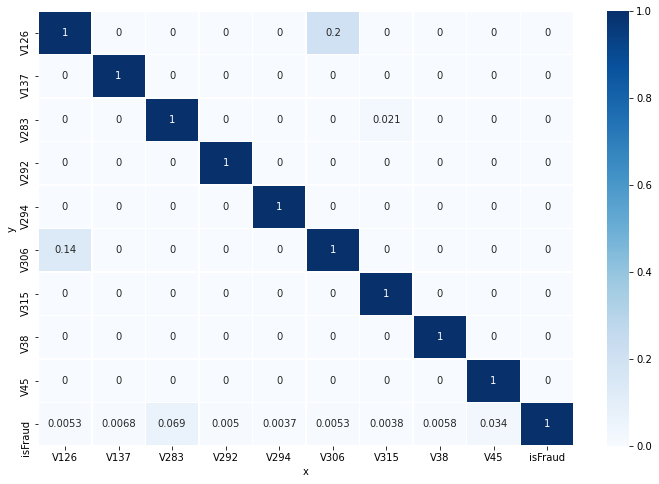

In [34]:
columns = list(predictors_df.x.values)
columns.append('isFraud')

plt.figure(figsize=(12,8))
matrix_df = pps.matrix(sample_data[columns])[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

In [35]:
categorical_cols = ['isFraud','card4','card6','P_emaildomain','M6','V33','V34','V51','V73','V94','V107']
Numerical_cols = ['D1', 'V297', 'V104', 'V313', 'V316', 'V132', 'V317', 'V283', 'V294', 'V311', 'V102', 'V129']


#need to convert all categorical columns dtype to string as ppsore with treat them numeric if not coverted and it will use Decision Tree Regressor

sample_data[categorical_cols] = sample_data[categorical_cols].astype('str')

In [36]:
#columns = categorical_cols + Numerical_cols
columns = ['isFraud','V313', 'V316', 'V132', 'V317', 'V283', 'V294', 'D1', 'V311', 'V102', 'V129']

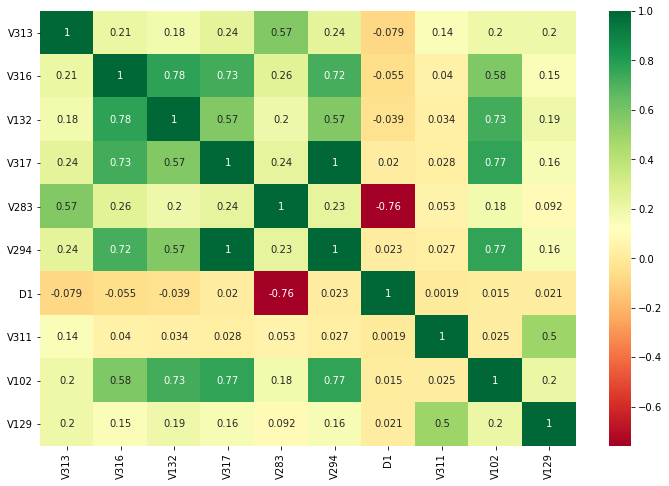

In [37]:
#lets first plot heat map for spearman correlation

plt.figure(figsize=(12,8))
sns.heatmap(sample_data[columns].corr(method='spearman'), annot=True, cmap='RdYlGn')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

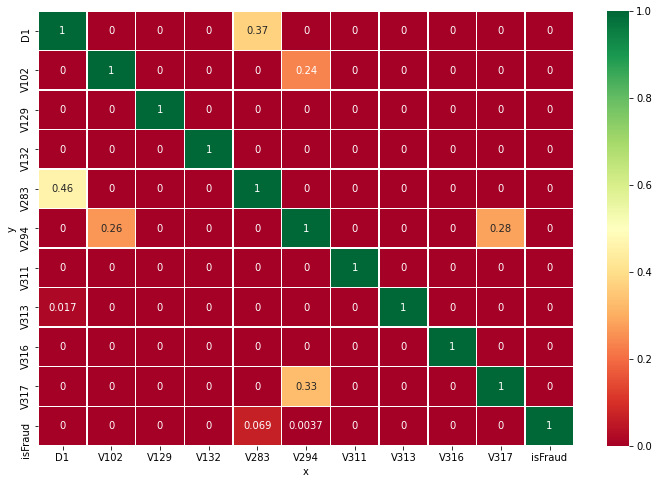

In [38]:
plt.figure(figsize=(12,8))
matrix_df = pps.matrix(sample_data[columns])[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="RdYlGn", linewidths=0.5, annot=True)

### Conclusion of statistical analysis.

1. Following features can be dropped if we are using Logistic Regression as they hav high correlation with other features.
['V105', 'V62', 'V122', 'V309', 'V70', 'V120', 'V29', 'V284','V311', 'V294', 'V289', 'V321', 'V282', 'V99', 'V315', 'V130', 'V86', 'V24', 'V297', 'V136', 'V134', 'V69', 'V279', 'V114', 'V116', 'V287', 'V133', 'V124', 'V45', 'V38', 'V292', 'V132', 'V119', 'V103', 'D15', 'D10', 'V318', 'V47', 'V308', 'C6', 'V78', 'V316', 'V131', 'V125', 'V280', 'C2', 'V319', 'V301', 'C13', 'D4','V128', 'V67', 'V102', 'V314', 'V137', 'V106', 'V129', 'V306', 'V312', 'V49', 'V98', 'V110', 'V100', 'V285', 'V13', 'V296', 'V20', 'V26', 'V115', 'V299', 'C11', 'V113', 'V135', 'V123', 'V48', 'C9','V295', 'V91', 'V76', 'V283', 'V83', 'V87', 'V127', 'V75', 'V54','V56', 'V298', 'V293', 'C14', 'V307', 'D1', 'V126', 'V74', 'V320', 'V30', 'V313', 'V36', 'V97', 'V90', 'V317', 'V310']


2. Categorica features V33, V34, V94 and V107 has relationship with the target isFraud

3. Below numerical features have good linear relation with the target and hence should be included in the model
['card1', 'card2', 'card5', 'addr1', 'C1', 'C2', 'C6', 'C9', 'C11', 'C14', 'V19', 'V23', 'V24', 'V35', 'V36', 'V37', 'V44', 'V45', 'V46', 'V75', 'V77', 'V82', 'V86', 'V87', 'V99', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V122', 'V123', 'V124', 'V125', 'V285', 'V311']

4. Below features showed good relation with target while using Logistic regression and must be included.

['V62', 'V128', 'V134', 'V279', 'V281', 'V282', 'V283', 'V293', 'V308', 'V316']

5. Below features have non-linear relation with the Target

['V281', 'V311', 'card2', 'V315']

